<a href="https://colab.research.google.com/github/arkwith7/aSSIST_ML/blob/main/deep_learning_1_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow , keras 필요 패키지를 불러온다다

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

훈련 데이터셋을 가져온다다

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


학습데이터의 형태, 갯수를 확인해 본다다

In [6]:
#학습데이터 모양양
x_train.shape

(60000, 28, 28)

In [7]:
#학습데이터중 세번째 데이터터 내용
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
#이미지데이터이니 채널수를 확인해봅니다다
x_train.ndim

3

In [11]:
#정답데이터 내용, 갯수,모양 등등을 확인
print("내용:",y_train)
print("갯수모양",y_train.shape)


내용: [5 0 4 ... 5 6 8]
갯수모양 (60000,)


이미지 실제 내용을 matplot를 이용 확인해 봅니다다

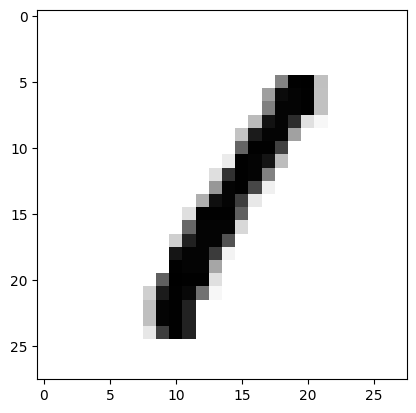

In [12]:
# 이미지 표시하기
import matplotlib.pyplot as plt

digit = x_train[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [13]:
#정답도 확인: x_train[3] 세번째 데이터에 대한 답지는 y_train[3] 
y_train[3]

1

텐서플로우 케라스를 이용 신경망 구조를 만듭니다

In [24]:
from keras.api._v2.keras import activations
#
from keras.engine.training import optimizer

# 신경망 구조
model = keras.Sequential([
    layers.Dense(512, activation="relu"), # 512 개의 뉴런
    layers.Dense(10, activation="softmax") # 10개의 softmax activation: 0~9까지 10개의 카테고리가 있기 때문  
    ])
# 구조를 만든 후 optimizer, loss function, 모니터링 지표 설정
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

### 데이터 preprocessing
NN은 데이터의 스케일에 민감하기 때문에 적절한 전처리 과정이 필요함 여기서는 이미지에서 흑백 그림을 나타내는 0 ~ 255 까지의 값을 0~1 사이의 값으로 변환

하나의 데이터는 하나의 row 여야 되므로 (28, 28) 의 이미지 데이터를 (28*28, 1) 로 변환

In [15]:
# 변환 전 보기
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype("float32") / 255
x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype("float32") / 255

In [17]:
x_train[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
x_train[3].shape

(784,)

### 훈련하기

1 epoch : 전체 데이터를 1회 학습


minibatch : 전체 데이터를 batch_size 에서 지정해준 사이즈로 나눠서 훈련함

batch_size : minibath 에서 나누려고 하는 사이즈

1 interation : 1회 학습

100개의 데이터가 있고, batch_size 가 10 이면, 1 epoch 는 10 iteration

In [25]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 2.2367 - accuracy: 0.2679
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.6777 - accuracy: 0.5963
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0502 - accuracy: 0.7465
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7528 - accuracy: 0.8097
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6072 - accuracy: 0.8393


###예측하기기

In [27]:
test_digits = x_test[0:10]
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 40ms/step


In [28]:
predictions[0] # 0번 데이터의 예측결과가 확율로 나옴옴

array([6.1564217e-04, 3.7479458e-05, 1.0674256e-04, 1.5015500e-03,
       1.2022967e-03, 2.2126625e-03, 6.4783308e-06, 9.6612465e-01,
       4.1240026e-04, 2.7780196e-02], dtype=float32)

In [29]:
predictions[0].argmax() # argmax는 가장 큰것을 출력하는 함수수

7

In [30]:
# 정답
y_test[0]

7